In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
import kramersmoyal
import seaborn as sns

In [12]:
sns.set()

In [13]:
#import and clean up data
H1_data = pd.read_csv("GJ_1H_BID_NW.csv")
H1_data['Local time'] = H1_data['Local time'].apply(lambda x: x[:-9])
H1_data['Local time'] = H1_data['Local time'].apply(lambda x: dt.datetime.strptime(x,'%d.%m.%Y %H:%M:%S.%f'))

In [14]:
close_price = H1_data["Close"].to_numpy()
close_price_std = close_price/(10*np.std(close_price))

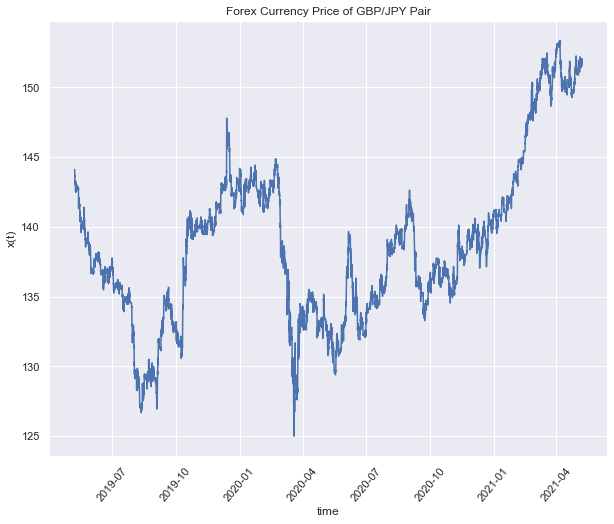

In [15]:
plt.figure(figsize = (10, 8))
plt.plot(H1_data['Local time'], close_price)
plt.xticks(rotation=50);
plt.xlabel('time')
plt.ylabel('x(t)')
plt.title('Forex Currency Price of GBP/JPY Pair')
plt.savefig("./plots/GJ_price.png")

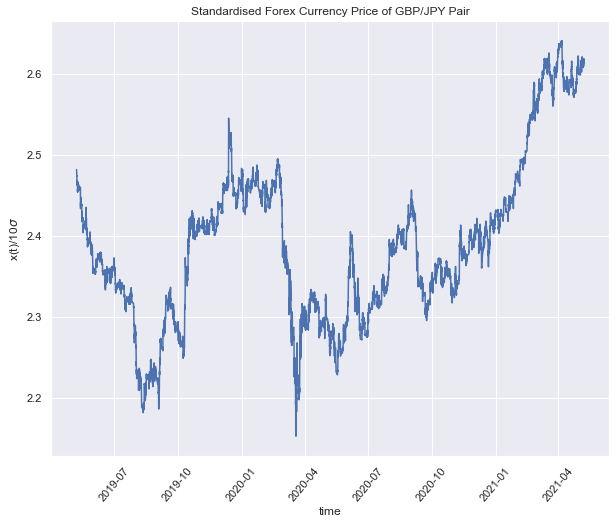

In [16]:
plt.figure(figsize = (10, 8))
plt.plot(H1_data['Local time'], close_price_std)
plt.xticks(rotation=50);
plt.xlabel('time')
plt.ylabel(r'x(t)/10$\sigma$')
plt.title('Standardised Forex Currency Price of GBP/JPY Pair')
plt.savefig("./plots/GJ_price_std.png")

In [8]:
r1 = 1
r0 = 2

v_r1 = [np.log(H1_data["Close"][i + r1] / H1_data["Close"][i]) for i in range(len(H1_data["Close"])-r1)]
v_r0 = [np.log(H1_data["Close"][i + r0] / H1_data["Close"][i]) for i in range(len(H1_data["Close"])-r0)]
dif = len(v_r1) - len(v_r0)
v_r1 = v_r1[:-dif]

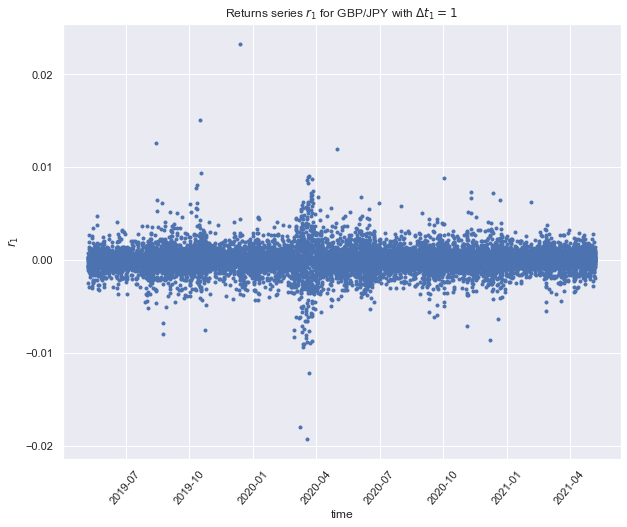

In [21]:
plt.figure(figsize = (10, 8))
plt.title(r"Returns series $r_1$ for GBP/JPY with $\Delta t_1 =  1$")
plt.plot(H1_data['Local time'][:-(r1+1)], v_r1, '.')
plt.ylabel(r"$r_1$")
plt.xlabel('time')
plt.xticks(rotation=50);
plt.savefig("./plots/ret_1.png")

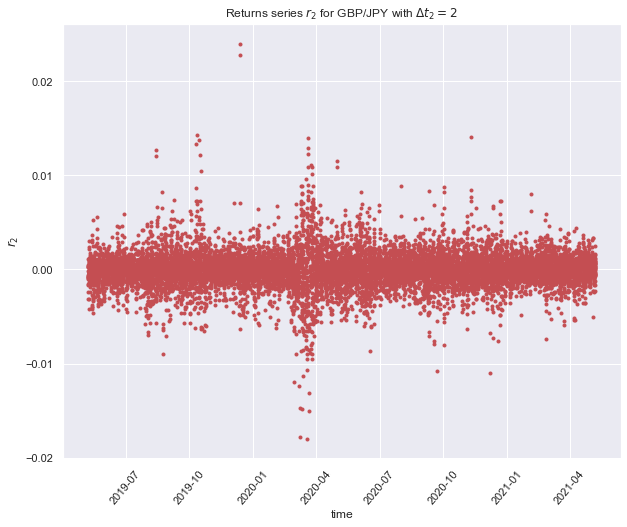

In [26]:
plt.figure(figsize = (10, 8))
plt.title(r"Returns series $r_2$ for GBP/JPY with $\Delta t_2 =  2$")
plt.plot(H1_data['Local time'][:-(r0)], v_r0, 'r.')
plt.ylabel(r"$r_2$")
plt.xlabel('time')
plt.xticks(rotation=50);
plt.savefig("./plots/ret_2.png")

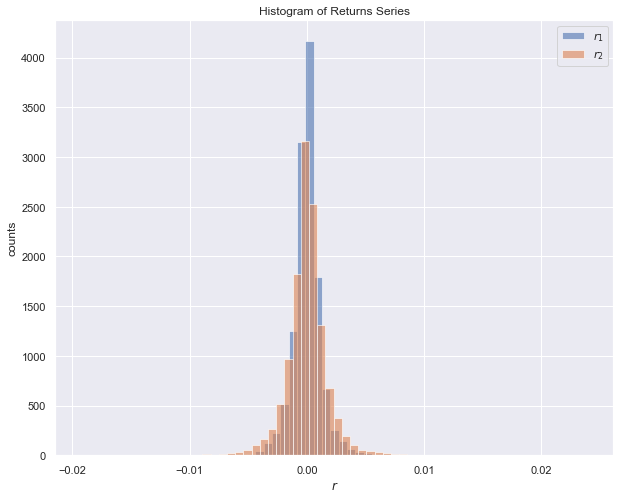

In [31]:

plt.figure(figsize = (10, 8))
plt.hist(v_r1, bins = 60, alpha = 0.6, label = r'$r_1$');
plt.hist(v_r0, bins = 60, alpha = 0.6, label = r'$r_2$');
plt.legend()
plt.xlabel(r'$r$')
plt.ylabel('counts')
plt.title('Histogram of Returns Series')
plt.savefig("./plots/hist_ret.png")

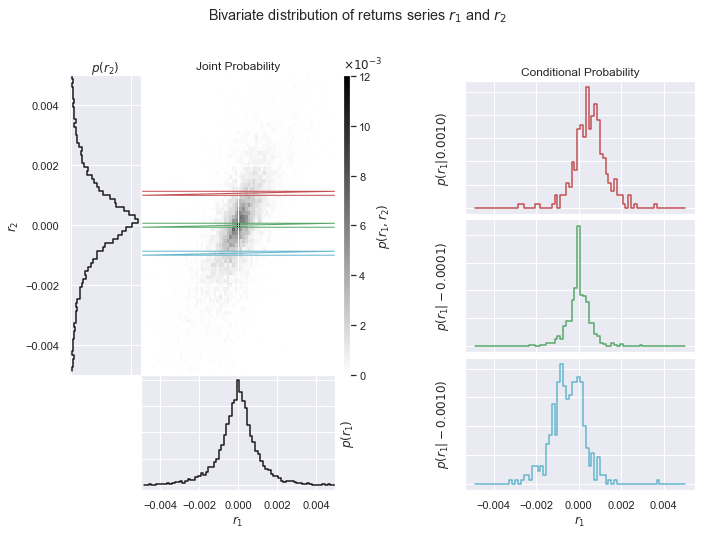

In [122]:
## AstroML Code for a Conditional Probability distribution

from matplotlib.ticker import NullFormatter, NullLocator, MultipleLocator
grid_lim = 0.005

# plot the result
fig = plt.figure(figsize=(10, 8))

# define axes
ax_Pxy = plt.axes((0.2, 0.34, 0.27, 0.52))
ax_Px = plt.axes((0.2, 0.14, 0.27, 0.2))
ax_Py = plt.axes((0.1, 0.34, 0.1, 0.52))
ax_cb = plt.axes((0.48, 0.34, 0.01, 0.52))
ax_Px_y = [plt.axes((0.65, 0.62, 0.32, 0.23)),
           plt.axes((0.65, 0.38, 0.32, 0.23)),
           plt.axes((0.65, 0.14, 0.32, 0.23))]

# set axis label formatters
ax_Px_y[0].xaxis.set_major_formatter(NullFormatter())
ax_Px_y[1].xaxis.set_major_formatter(NullFormatter())


ax_Pxy.xaxis.set_major_formatter(NullFormatter())
ax_Pxy.yaxis.set_major_formatter(NullFormatter())

ax_Px.yaxis.set_major_formatter(NullFormatter())
ax_Py.xaxis.set_major_formatter(NullFormatter())

# draw the joint probability
plt.axes(ax_Pxy)
H *= 1000
plt.imshow(H, interpolation='nearest', origin='lower', aspect='auto',
           extent=[-grid_lim, grid_lim, -grid_lim, grid_lim], cmap=plt.cm.binary)

cb = plt.colorbar(cax=ax_cb)
cb.set_label('$p(r_1, r_2)$')
plt.text(0, 1.02, r'$\times 10^{-3}$',
         transform=ax_cb.transAxes)

# draw p(x) distribution
ax_Px.plot(xbins[1:], H.sum(0), '-k', drawstyle='steps')

# draw p(y) distribution
ax_Py.plot(H.sum(1), ybins[1:], '-k', drawstyle='steps')

# define axis limits
ax_Pxy.set_xlim(-grid_lim,grid_lim)
ax_Pxy.set_ylim(-grid_lim,grid_lim)
ax_Px.set_xlim(-grid_lim,grid_lim)
ax_Py.set_ylim(-grid_lim,grid_lim)

# label axes
ax_Pxy.set_xlabel('$r_1$')
ax_Pxy.set_ylabel('$r_2$')
ax_Px.set_xlabel('$r_1$')
ax_Px.set_ylabel('$p(r_1)$')
ax_Px.yaxis.set_label_position('right')
ax_Py.set_ylabel('$r_2$')
ax_Py.set_xlabel('$p(r_2)$')
ax_Py.xaxis.set_label_position('top')


# draw marginal probabilities
iy = [int(2.4 * Ngrid / 4), int(Ngrid / 2), int(1.6*Ngrid / 4)]
colors = 'rgc'
axis = ax_Pxy.axis()
for i in range(3):
    # overplot range on joint probability
    ax_Pxy.plot([-grid_lim, grid_lim, -grid_lim, grid_lim],
                [ybins[iy[i] + 1], ybins[iy[i] + 1],
                 ybins[iy[i]], ybins[iy[i]]], c=colors[i], lw=1)
    Px_y = H[iy[i]] / H[iy[i]].sum()
    ax_Px_y[i].plot(xbins[1:], Px_y, drawstyle='steps', c=colors[i])
    ax_Px_y[i].yaxis.set_major_formatter(NullFormatter())
    ax_Px_y[i].set_ylabel('$p(r_1 | %.4f)$' % ybins[iy[i]])
ax_Pxy.axis(axis)

ax_Px_y[2].set_xlabel('$r_1$')

ax_Pxy.set_title('Joint Probability')
ax_Px_y[0].set_title('Conditional Probability')
fig.suptitle("Bivariate distribution of returns series $r_1$ and $r_2$")

plt.savefig("./plots/bivar_r1_r2.png")
plt.show()
